## **Universidad Peruana de Ciencias Aplicadas**
### CC235 - Procesamiento de Imágenes
### Segmentación de imágenes

---

### Segmentación Watershed

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage.segmentation import watershed
from skimage.feature import peak_local_max

### Crearemos la imagen de prueba

Imaginemos que son dos monedas de distinta denominación con oclusión

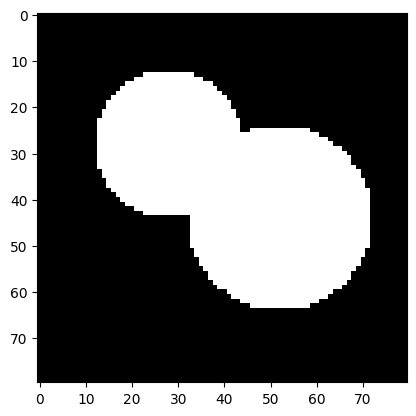

In [2]:
x, y = np.indices((80, 80))
x1, y1, x2, y2 = 28, 28, 44, 52
r1, r2 = 16, 20
mask_moneda1 = (x - x1)**2 + (y - y1)**2 < r1**2
mask_moneda2 = (x - x2)**2 + (y - y2)**2 < r2**2
image = np.logical_or(mask_moneda1, mask_moneda2)
plt.imshow(image, cmap='gray')

Vamos a usar [ndimage.distance_transform_edt](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.distance_transform_edt.html) que nos permite calcular la distancia de de cada punto (de la región con 1's) al punto más cercano del fondo (de la región con 0's)

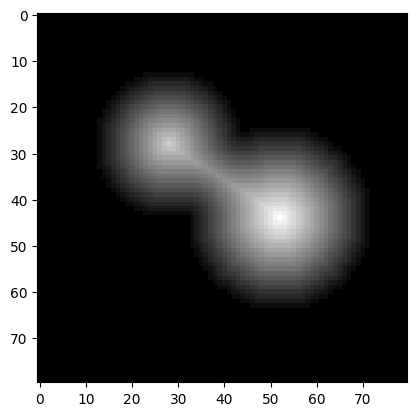

In [3]:
distance = ndimage.distance_transform_edt(image)
plt.imshow(distance, cmap='gray')

Vamos a usar la función [skimage.feature.peak_local_max](https://scikit-image.org/docs/0.12.x/api/skimage.feature.html#skimage.feature.peak_local_max) para encontrar los 'picos' en la imagen. Esto nos servirá para tener una suerte de 'semillas'

<ipython-input-4-2fb0afe4ec06>:1: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3, 3)),labels=image)


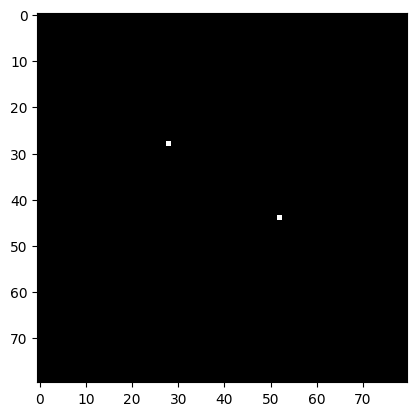

In [4]:
local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3, 3)),labels=image)
plt.imshow(local_maxi, cmap='gray')

A continuación vamos a usar la función [skimage.segmentation.watershed ](https://scikit-image.org/docs/dev/api/skimage.segmentation.html#skimage.segmentation.watershed)

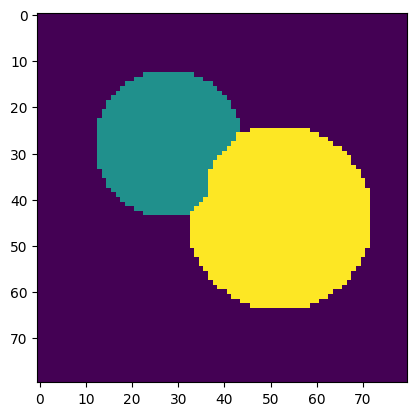

In [10]:
markers = ndimage.label(local_maxi)[0]
labels = watershed(-distance, markers, mask=image)
plt.imshow(labels)